# **MNIST**
## **Recognition of hand-written characters from the scikit-learn database using a perceptron**



Import the **MNIST** dataset of the digits from scikit-learn


In [2]:
from sklearn import datasets
digits = datasets.load_digits() #MNIST dataset
digits.images.shape        #size of dataset

(1797, 8, 8)

The data we are interested in are 8x8 images of digits. They are stored in the `images` attribute of the dataset. 

Have a look at the data and the classes: 

1.   For every image, we know which digit it represents. It is the  'target' of the dataset.
2.   Show the first 10 images and their target.



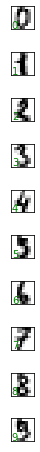

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,1, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

To apply a perceptron classifier on this data, we will not use 8x8 images but the vectorized version stored in digits.data.


In [4]:
print(digits.images.shape[0])
print(digits.keys())
print(digits.target_names.shape[0])
print(digits.data)

1797
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
10
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


Convert the target into the matrix 'y' in one-hot format.
This will allow the predictors output one at a time using the soft-max activation. What is the shape of the 'y' matrix. Use the keras function **utils.to_categorical()**.

In [5]:
import keras
label=keras.utils.to_categorical(digits.target,num_classes=10)

Using TensorFlow backend.


## Prepare the train and test dataset.

1.   split dataset into test and train dataset.
2.   split further the train dataset into train and validation part


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(digits.data,label, test_size=0.25, random_state=42)

## create the sequential model





In [7]:
from keras.models import Sequential
from keras.layers import Dense,Activation
model = Sequential()    
model.add(Dense(1000,input_dim=64,kernel_initializer = 'normal',activation = 'relu')) 
model.add(Dense(units = 10,kernel_initializer = 'normal',activation = 'softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=["accuracy"])


## train the model


In [13]:
hist=model.fit(x_train,y_train,batch_size=10,validation_split=0.25,nb_epoch=100,shuffle=True,verbose=1)

Train on 1010 samples, validate on 337 samples
Epoch 1/100
 610/1010 [=================>............] - ETA: 0s - loss: 1.5334 - acc: 0.9049

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


1010/1010 [==============================] - 0s 291us/step - loss: 1.5328 - acc: 0.9050 - val_loss: 1.9426 - val_acc: 0.8546
Epoch 2/100
1010/1010 [==============================] - 0s 266us/step - loss: 1.5328 - acc: 0.9050 - val_loss: 1.9424 - val_acc: 0.8516
Epoch 3/100
1010/1010 [==============================] - 0s 282us/step - loss: 1.5328 - acc: 0.9050 - val_loss: 1.9422 - val_acc: 0.8516
Epoch 4/100
1010/1010 [==============================] - 0s 267us/step - loss: 1.5328 - acc: 0.9050 - val_loss: 1.9420 - val_acc: 0.8516
Epoch 5/100
1010/1010 [==============================] - 0s 261us/step - loss: 1.5328 - acc: 0.9050 - val_loss: 1.9419 - val_acc: 0.8516
Epoch 6/100
1010/1010 [==============================] - 0s 289us/step - loss: 1.5328 - acc: 0.9050 - val_loss: 1.9419 - val_acc: 0.8516
Epoch 7/100
1010/1010 [==============================] - 0s 270us/step - loss: 1.5328 - acc: 0.9050 - val_loss: 1.9421 - val_acc: 0.8516
Epoch 8/100
1010/1010 [==============================

## Analyze the results.



In [12]:
print (model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              65000     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 75,010
Trainable params: 75,010
Non-trainable params: 0
_________________________________________________________________
None


## print the confusion matrix obtained on the test dataset.

Use the **confusion_matrix()** function provided in **sklearn.metrics**.

Confusion matrix, without normalization
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  1  0  0  0  0]
 [ 0  0  0  0 55  0  0  0  0  0]
 [ 0  0  1  0  0 55  1  0  0  2]
 [ 1  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 1  0  0  0  0  1  0  0 36  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


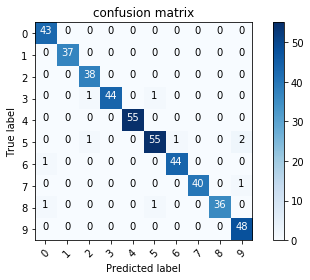

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

class_names = ["0","1","2","3","4","5","6","7","8","9"]
y_test_pred = model.predict(x_test).round()
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_test_pred.argmax(axis=1))
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=False,title='confusion matrix')
plt.show()


Normalize the confusion matrix to show graphically the prediction probability map.


Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.02173913 0.95652174 0.         0.02173913
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.01694915 0.         0.         0.93220339
  0.01694915 0.         0.         0.03389831]
 [0.02222222 0.         0.         0.         0.         0.
  0.97777778 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.97560976 0.         0.02439024]
 [0.02631579 0.         0.         0.         0.         0.02631579
  0.         0.         0.947368

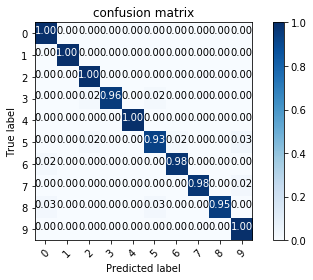

number 0 counts: 43
number 1 counts: 37
number 2 counts: 38
number 3 counts: 44
number 4 counts: 55
number 5 counts: 55
number 6 counts: 44
number 7 counts: 40
number 8 counts: 36
number 9 counts: 48


In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='confusion matrix')
plt.show()
for i in range(10):
  print('number %d counts: %d'%(i,cnf_matrix[i,i]))



Evaluate the model on the test dataset. Use the model's class function **evaluate()**.

In [11]:
print('accuracy on the test dataset is',model.evaluate(x_test,y_test,batch_size=1)[1])

450/450 [==============================] - 0s 1ms/step
accuracy on the test dataset is 0.8844444444444445


## **History plot**


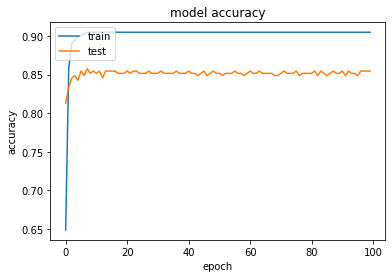

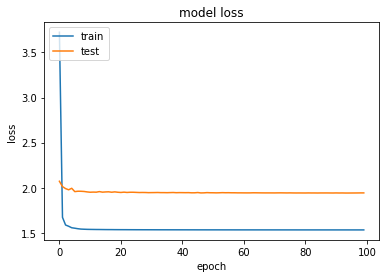

In [10]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()